# World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.

The summary of this notebook:

* Data cleaning.

* Relationship between education and cigsPerDay,

* Relationship between age and cigsPerDay, totChol, glucose.

* Which gender has more risk of coronary heart disease CHD.

* Which age group has more smokers.

* Relation between cigsPerDay and risk of coronary heart disease.

* Relation between sysBP and risk of CHD.

* Relation between diaBP and risk of CHD.

* Predicting the risk of CHD with Linear Regression.(85% accuracy)

In [1]:
#importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#reading the CSV file

location = "../input/heart-disease-prediction-using-logistic-regression/framingham.csv"
data = pd.read_csv(location)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data cleaning

In [3]:
#Checking whether the dataset have any NaN.

data.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [4]:
#Looking at the features of the education column:

data["education"].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [5]:
#replacing the NaN's with the mean(rounding up to the nearest whole number)

data["education"] = data["education"].fillna(2)

In [6]:
#Looking at the features of the cigsPerDay column:

data["cigsPerDay"].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [7]:
#replacing the NaN's with the mean

data["cigsPerDay"] = data["cigsPerDay"].fillna(data["cigsPerDay"].mean())

In [8]:
#Looking at the features of the BPMeds column:

data["BPMeds"].describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [9]:
#replacing the NaN's with the mean

data["BPMeds"] = data["BPMeds"].fillna(data["BPMeds"].mean())

In [10]:
#Looking at the features of the totChol column:

data["totChol"].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [11]:
#replacing the NaN's with the mean

data["totChol"] = data["totChol"].fillna(data["totChol"].mean())

In [12]:
#Looking at the features of the BMI column:

data["BMI"].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [13]:
#replacing the NaN's with the mean

data["BMI"] = data["BMI"].fillna(data["BMI"].mean())

In [14]:
#Looking at the features of the heartRate column:

data["heartRate"].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [15]:
#replacing the NaN's with the mean

data["heartRate"] = data["heartRate"].fillna(data["heartRate"].mean())

In [16]:
#Looking at the features of the glucose column:

data["glucose"].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [17]:
#replacing the NaN's with the mean

data["glucose"] = data["glucose"].fillna(data["glucose"].mean())

In [18]:
#checking for NaN's 

data.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

Now our data is ready for further use: 

# Relationship between education and cigsPerDay

In [19]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text yticklabel objects>)

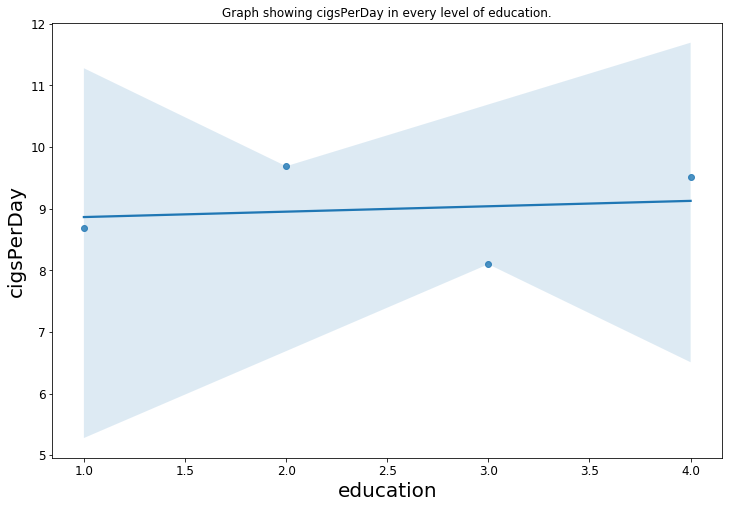

In [20]:

plt.figure(figsize=(12,8))
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.")
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is no such linear relationship found.
level 3 education shows the lowest mean.

# Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text yticklabel objects>)

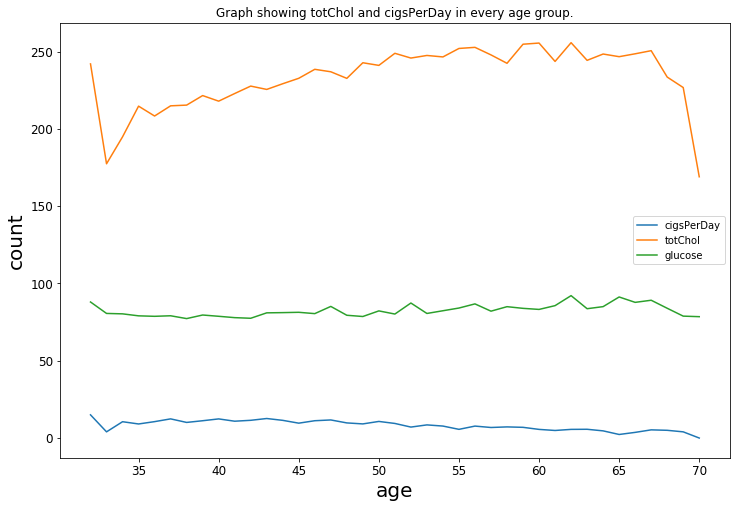

In [21]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_3 = data.groupby("age").cigsPerDay.mean()
graph_4 = data.groupby("age").totChol.mean()
graph_5 = data.groupby("age").glucose.mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=graph_3, label="cigsPerDay")
sns.lineplot(data=graph_4, label="totChol")
sns.lineplot(data=graph_5, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.")
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

We see a minor relation between totChol and glucose.

# Which gender has more risk of coronary heart disease CHD

In [22]:
#checking for which gender has more risk of coronary heart disease CHD

graph_6 = data.groupby("male", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text yticklabel objects>)

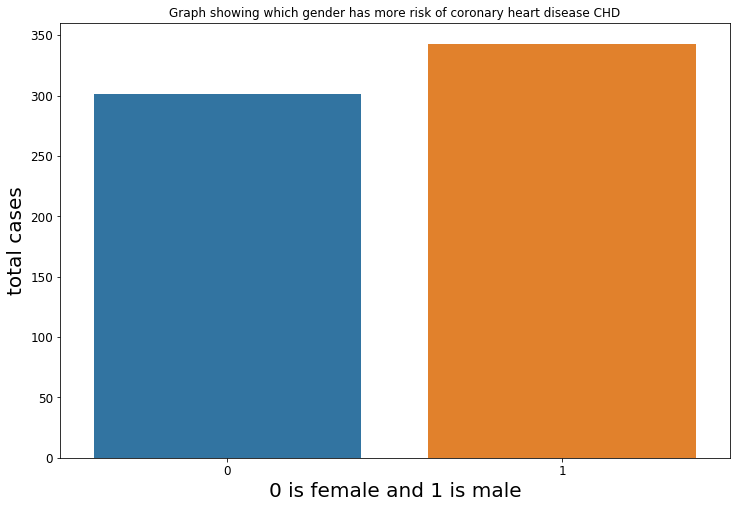

In [23]:
#Ploting the above values

plt.figure(figsize=(12,8))
sns.barplot(x=graph_6["male"], y=graph_6["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD")
plt.xlabel("0 is female and 1 is male",size=20)
plt.ylabel("total cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, males have slighly higher risk of coronary heart disease CHD.

# Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

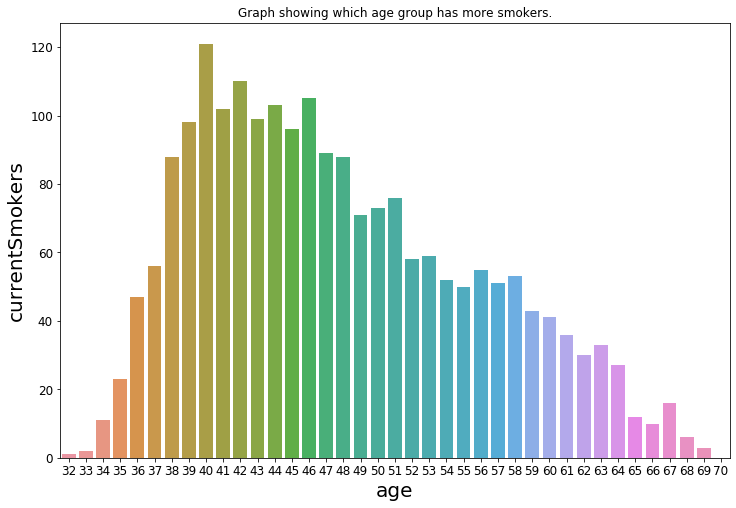

In [24]:
#grouping the necessary features

graph_7 = data.groupby("age",as_index=False).currentSmoker.sum()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_7["age"], y=graph_7["currentSmoker"])
plt.title("Graph showing which age group has more smokers.")
plt.xlabel("age", size=20)
plt.ylabel("currentSmokers", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Mid-age groups have more smokers

# Relation between cigsPerDay and risk of coronary heart disease.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

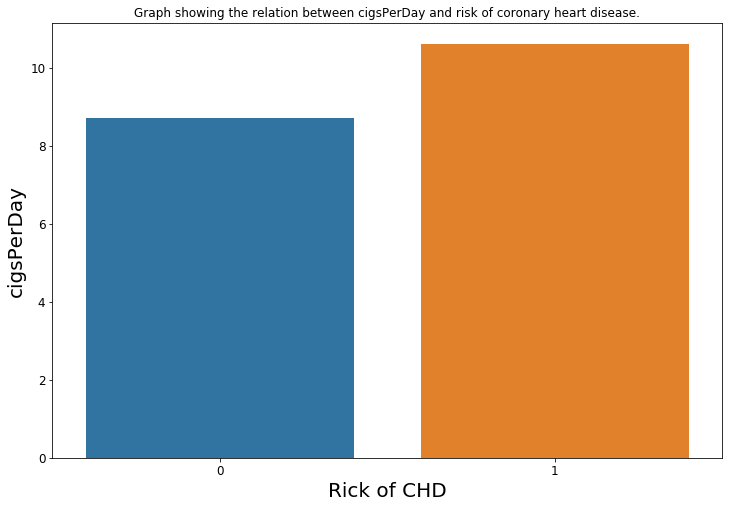

In [25]:
graph_8 = data.groupby("TenYearCHD", as_index=False).cigsPerDay.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_8["TenYearCHD"], y=graph_8["cigsPerDay"])
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.")
plt.xlabel("Rick of CHD", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

High cigsPerDay comes with higher risk of CHD.

# Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

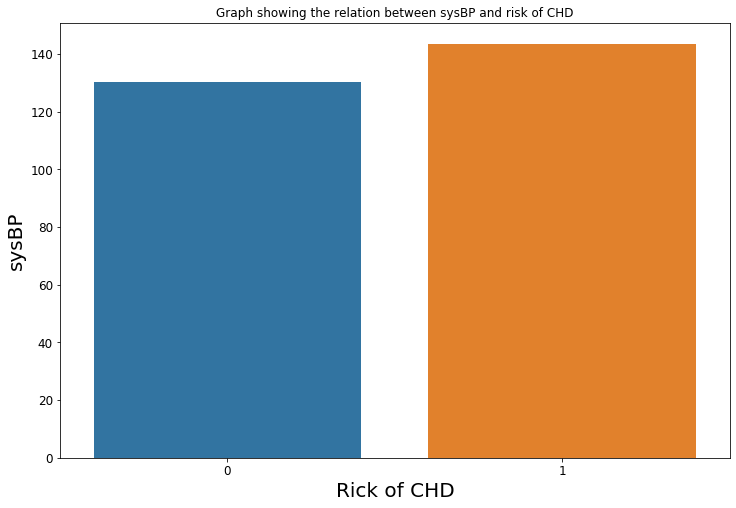

In [26]:
# Grouping up the data and ploting it

graph_9 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_9["TenYearCHD"], y=graph_9["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD")
plt.xlabel("Rick of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation found between higher risk with higher sysBP  

# Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

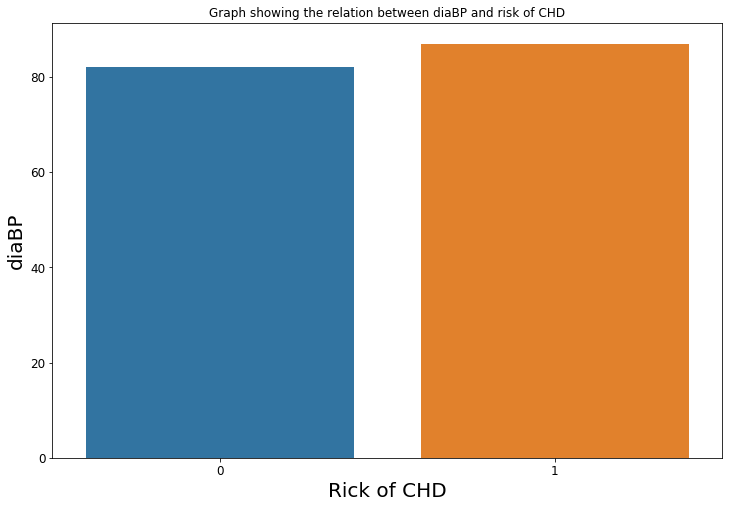

In [27]:
# Grouping up the data and ploting it

graph_9 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_9["TenYearCHD"], y=graph_9["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD")
plt.xlabel("Rick of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation found between higher risk with higher diaBP  

# Predicting the risk of CHD with Logistic Regression. (85% accuracy)

In [28]:
# collecting the features in X

X = data.drop(columns=["TenYearCHD"])

In [29]:
# y is the target variable (risk of CHD)

y = data["TenYearCHD"]

In [30]:
# defining the model

model = LogisticRegression(random_state=3, max_iter=1000)

In [31]:
# splitting and training the data

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.5)

In [32]:
# fitting the model with X and y

model.fit(train_X, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# accuracy of the model is

model.score(test_X, test_y)

0.85181689476168